In [1]:
import sys
sys.path.insert(
    0,
    r"C:\Users\DELL\Desktop\Math and Stats for DS (CSC)",
)

In [2]:
%reload_ext autoreload

In [3]:
%autoreload 2

In [4]:
from utils import * 

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv('group.csv')

In [7]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Group
0,1.111460,10.625660,6.917054,7.240412,-7.504841,-10.294909,0.873230,-6.752584,2.724180,0.136606,2
1,3.922212,-5.457902,6.037059,10.372529,-3.383697,5.837285,-8.166151,-1.318083,-9.058159,9.955288,1
2,8.998367,1.313214,8.651334,6.086529,0.962872,-7.069004,9.286666,-11.965042,-4.219077,-4.333978,0
3,0.076301,8.199190,-2.716994,-7.578235,-7.772931,-3.542986,4.285229,3.948615,-1.028294,3.300239,3
4,8.947106,2.617702,11.026892,0.614568,4.029671,-5.606354,7.968009,-9.516573,-7.851421,-0.191799,0


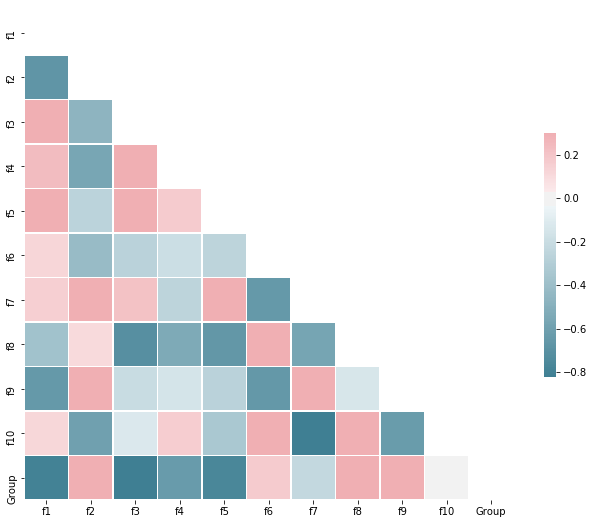

In [11]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

[0.4145438128627056, 0.7559273882506137, 0.9154228281335155, 0.9355075877122083, 0.9518471761770797, 0.9642982250643041, 0.9749939981389942, 0.9842950560634708, 0.9925202774075149, 0.9998719032380826]


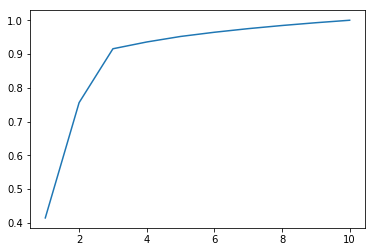

In [27]:
explained_var_ratios = []
lst = list(range(1,11))
for i in range(1,11):
    pca = PCA(i)
    pca.fit(data)
    explained_var_ratios.append(sum(pca.explained_variance_ratio_))
print(explained_var_ratios)
plt.plot(lst, explained_var_ratios)
plt.show()

* Ta thấy lựa chọn dimentions bằng 8 là hợp lý do vẫn dữ được explained ratio lớn hơn 0.9 

In [28]:
pca = PCA(8)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
components = pca.transform(data)
projected = pca.inverse_transform(components)

In [30]:
components.shape

(100, 8)

In [31]:
components

array([[-8.14398029e+00,  3.57522724e-01,  9.98639721e+00,
         4.23972862e-01, -2.12005522e-01, -4.27857276e-01,
        -3.82894858e-01, -3.11907323e+00],
       [ 1.89337098e+01, -4.43073899e-01,  5.25989754e-02,
        -3.89466299e+00,  2.30208156e+00, -9.30260186e-01,
        -6.53427665e-02,  1.94262217e+00],
       [-6.33903388e+00,  1.43768173e+01, -3.09623411e+00,
         1.27855426e+00,  5.31922219e-01,  3.67905981e+00,
         2.42940749e-01, -9.70001545e-01],
       [-7.75906925e+00, -1.43838836e+01, -5.48056133e+00,
         3.35829541e+00,  2.61938291e+00, -1.87902153e+00,
        -2.62574394e+00,  1.02364856e-01],
       [-4.39519670e+00,  1.15005211e+01, -9.11613928e+00,
        -1.41927247e+00, -1.43832686e+00,  2.44337376e-01,
        -1.55386950e+00, -2.53274279e+00],
       [-8.05632997e+00, -1.97534182e+00,  7.72285311e+00,
         1.49422873e+00,  1.07234044e+00,  7.95092436e-01,
         4.66469773e+00, -2.64687967e+00],
       [ 1.81771058e+01,  2.739514